In [3]:
import pandas as pd
import numpy as np

from datetime import datetime
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

In [4]:
from IPython.display import Image

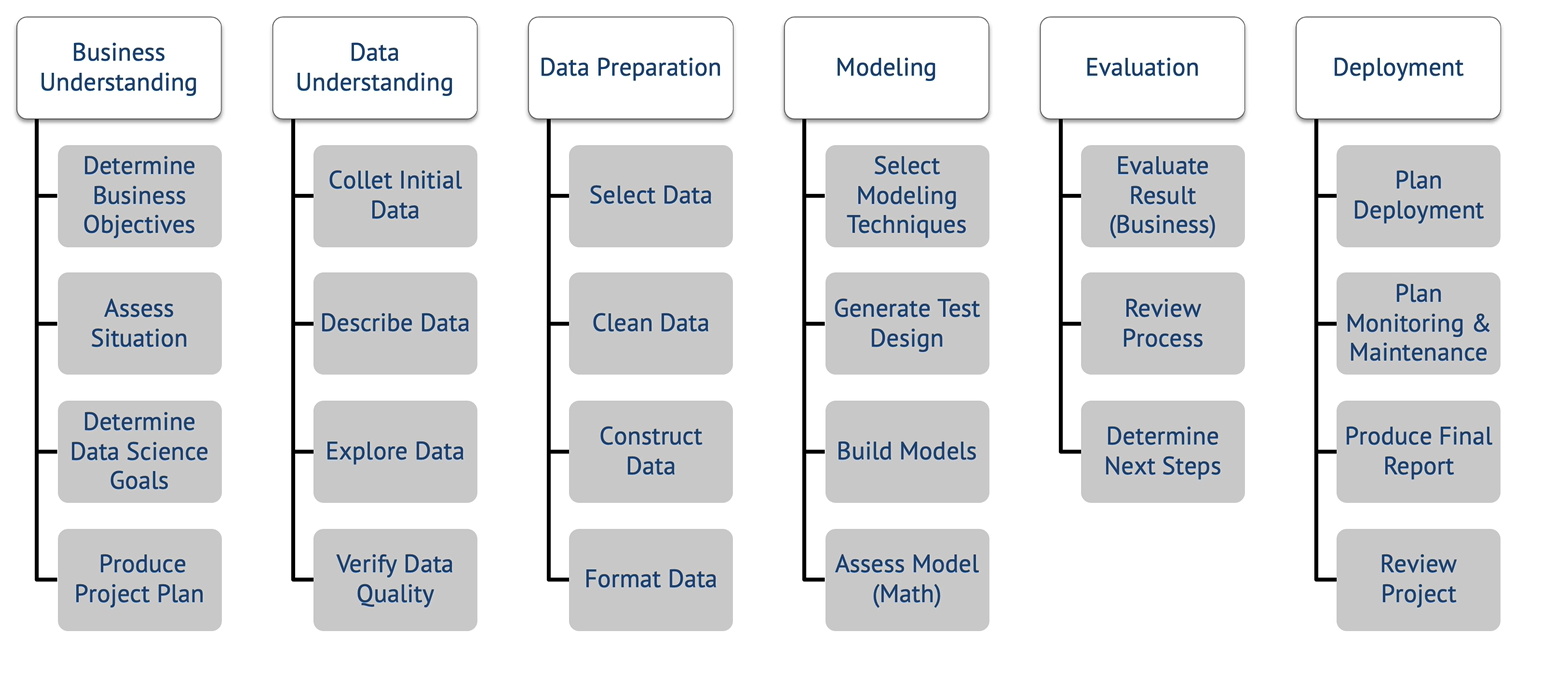

In [5]:
Image('CRISP_DM.png')

# Explorative Data Analysis

* focus is often a visual representation of the data

# Matplotlib example

In [6]:
df_plot=pd.read_csv('C:/Users/Asus/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

,date,Italy,United Kingdom,Spain,Germany,"Korea, South"
0,2020-01-22,0,0,0,0,1
1,2020-01-23,0,0,0,0,1
2,2020-01-24,0,0,0,0,2
3,2020-01-25,0,0,0,0,2
4,2020-01-26,0,0,0,0,3


<Figure size 432x288 with 0 Axes>

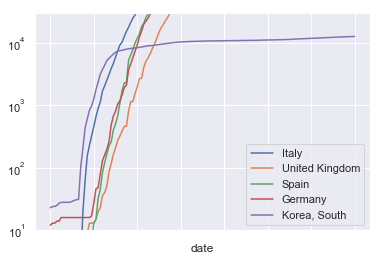

In [7]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 30000)
ax.set_yscale('log')

# Plot.ly

In [8]:
import plotly.graph_objects as go

In [9]:
import plotly
plotly.__version__

'4.9.0'

In [10]:
fig = go.Figure()

In [11]:
country_list=['Italy',
              'United Kingdom',
              'Spain',
              'Germany',
              'Korea, South' 
]

In [13]:
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                        y=df_plot[each],
                        mode='markers+lines',
                        opacity=0.9,
                        line_width=2,
                        marker_size=4,
                        name=each
                        )
             )
## defines the overall layout properties
fig.update_layout(
        width=1000,
        height=600,
        xaxis_title="Time",
        yaxis_title="Confirmed infected people (source john hopkins csse, log-scale)",
)
fig.update_yaxes(type="log", range=[1.1,5.5])

fig.update_layout(xaxis_rangeslider_visible=True)

In [27]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-select country'),
    dcc.Dropdown(
    id='country_drop_down',
    options=[
        {'label': 'Italy', 'value': 'Italy'},
        {'label': 'United Kingdom', 'value': 'United Kingdom'},
        {'label': 'Spain', 'value': 'Spain'},
        {'label': 'Germany', 'value': 'Germany'},
        {'label': 'Korea, South', 'value': 'Korea, South'}
    ],
    value=['United Kingdom', 'Germany'], # which are pre-selected
    multi=True
    ),
    
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [28]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                        y=df_plot[each],
                        mode='markers+lines',
                        opacity=0.9,
                        line_width=2,
                        marker_size=4,
                        name=each
                      )
                 )
    return{
        'data' : traces,
        'layout' : dict (
        width=1280,
        height=720,
        xaxis_title="Time",
        yaxis_title="Confirmed infected people (source john hopkins csse, log-scale)",
        xaxis={'tickangle':-45,
               'nticks':20,
               'tickfont':dict(size=14,colour="#7f7f7f"),
              },
        yaxis={'type':"log",
               'range':'[1.1,5.5]'
        }
        )
    }

In [ ]:
# take care to press stop button before calling once again, since address will be blocked (server up)
app.run_server(debug=True, use_reloader=False) #Turn off reloader if inside Jupyter

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 928-347-237
Debugger PIN: 928-347-237
Debugger PIN: 928-347-237
Debugger PIN: 928-347-237
Debugger PIN: 928-347-237
Debugger PIN: 928-347-237
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
